## Laptop Dataset Analysis

### Load Necessary Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 

### Load Data

In [3]:
df = pd.read_csv(r"C:\Users\pc\Desktop\laptop dataset.csv")

In [4]:
df

,Brand,Processor,RAM (GB),Storage,GPU,Screen Size (inch),Resolution,Battery Life (hours),Weight (kg),Operating System,Price ($)
0,Apple,AMD Ryzen 3,64,512GB SSD,Nvidia GTX 1650,17.3,2560x1440,8.9,1.42,FreeDOS,3997.07
1,Razer,AMD Ryzen 7,4,1TB SSD,Nvidia RTX 3080,14.0,1366x768,9.4,2.57,Linux,1355.78
2,Asus,Intel i5,32,2TB SSD,Nvidia RTX 3060,13.3,3840x2160,8.5,1.74,FreeDOS,2673.07
3,Lenovo,Intel i5,4,256GB SSD,Nvidia RTX 3080,13.3,1366x768,10.5,3.10,Windows,751.17
4,Razer,Intel i3,4,256GB SSD,AMD Radeon RX 6600,16.0,3840x2160,5.7,3.38,Linux,2059.83
...,...,...,...,...,...,...,...,...,...,...,...
11763,Acer,Intel i3,4,2TB SSD,Nvidia RTX 2060,17.3,1366x768,11.5,1.58,macOS,704.82
11764,Asus,Intel i3,4,2TB SSD,AMD Radeon RX 6800,16.0,1366x768,9.5,2.14,Linux,775.59
11765,Razer,AMD Ryzen 9,4,2TB SSD,AMD Radeon RX 6600,15.6,2560x1440,8.2,2.05,Linux,2789.46
11766,Samsung,AMD Ryzen 7,16,512GB SSD,Integrated,13.3,1920x1080,7.5,1.48,macOS,1067.13


### Data Preprocessing

In [6]:
df.describe()

,RAM (GB),Screen Size (inch),Battery Life (hours),Weight (kg),Price ($)
count,11768.000000,11768.000000,11768.000000,11768.000000,11768.000000
mean,24.852821,15.212305,8.027855,2.341117,2183.571608
std,21.762567,1.436997,2.305400,0.667921,1316.886132
min,4.000000,13.300000,4.000000,1.200000,279.570000
25%,8.000000,14.000000,6.000000,1.760000,1272.045000
50%,16.000000,15.600000,8.000000,2.340000,1840.865000
75%,32.000000,16.000000,10.000000,2.910000,2698.370000
max,64.000000,17.300000,12.000000,3.500000,10807.880000


In [7]:
df.isnull().sum()

Brand                   0
Processor               0
RAM (GB)                0
Storage                 0
GPU                     0
Screen Size (inch)      0
Resolution              0
Battery Life (hours)    0
Weight (kg)             0
Operating System        0
Price ($)               0
dtype: int64

## Exploratory Data Analysis(EDA)

### 1. What are the top 5 most popular (most common) laptop brands in this dataset?


In [8]:
df['Brand'].value_counts().head(5)


Brand
Apple        1262
HP           1208
MSI          1190
Microsoft    1175
Dell         1170
Name: count, dtype: int64

### 2. How does the average price of laptops compare across different brands?


In [9]:
df.groupby('Brand')['Price ($)'].mean().sort_values(ascending=False)


Brand
Apple        2915.364279
Razer        2695.213804
MSI          2517.552227
Lenovo       1978.465790
Microsoft    1975.203549
Dell         1972.270222
Samsung      1959.007248
HP           1938.518733
Asus         1927.315142
Acer         1914.108515
Name: Price ($), dtype: float64

### 3. What is the relationship between the type of processor (like Intel i9, AMD Ryzen 7) and the average price of a laptop?


In [10]:
df.groupby('Processor')['Price ($)'].mean().sort_values(ascending=False)


Processor
Intel i9       3084.511834
AMD Ryzen 9    3067.286753
Intel i7       2300.938979
AMD Ryzen 7    2277.774418
AMD Ryzen 5    1862.017925
Intel i5       1829.125983
Intel i3       1555.673013
AMD Ryzen 3    1534.919567
Name: Price ($), dtype: float64

### 4.What is the distribution of laptops across different operating systems (like Windows, macOS, Linux)?


In [11]:
df['Operating System'].value_counts()


Operating System
Windows    2954
FreeDOS    2952
Linux      2946
macOS      2916
Name: count, dtype: int64

### 5. How does the screen resolution of a laptop affect its average price?

In [12]:
df.groupby('Resolution')['Price ($)'].mean().sort_values(ascending=False)


Resolution
3840x2160    3017.422036
2560x1440    2294.514609
1920x1080    1878.658218
1366x768     1530.799253
Name: Price ($), dtype: float64

### 6. Is there a connection between the amount of RAM (in GB) in a laptop and its price?


In [13]:
df.groupby('RAM (GB)')['Price ($)'].mean().sort_index()


RAM (GB)
4     1387.705468
8     1551.721969
16    1855.332740
32    2486.663017
64    3625.575197
Name: Price ($), dtype: float64

### 7. What is the overall average price of laptops in this dataset?


In [14]:
df['Price ($)'].mean()


2183.57160774983

### 8. What is the overall average battery life (in hours) for these laptops?

In [16]:
df['Battery Life (hours)'].mean()


8.027855200543849

### 9. How does average battery life vary with different screen sizes?


In [17]:
df.groupby('Screen Size (inch)')['Battery Life (hours)'].mean()


Screen Size (inch)
13.3    8.048002
14.0    7.956324
15.6    8.042514
16.0    8.027724
17.3    8.067481
Name: Battery Life (hours), dtype: float64

### 10. What is the distribution of laptop weights (kg) in this dataset?

In [18]:
df['Weight (kg)'].describe()


count    11768.000000
mean         2.341117
std          0.667921
min          1.200000
25%          1.760000
50%          2.340000
75%          2.910000
max          3.500000
Name: Weight (kg), dtype: float64

### 11. How does the type of GPU (Graphics Processing Unit) influence the average price of a laptop?


In [19]:
df.groupby('GPU')['Price ($)'].mean().sort_values(ascending=False)


GPU
Nvidia RTX 3060       2337.062001
AMD Radeon RX 6800    2319.744506
AMD Radeon RX 6600    2290.889069
Nvidia GTX 1650       2290.877444
Nvidia RTX 2060       2273.021833
Nvidia RTX 3080       2259.618349
Integrated            1500.884743
Name: Price ($), dtype: float64

### 12. For a specific operating system (e.g., "Windows"), what is the average price of laptops with different screen resolutions?


In [20]:
df[df['Operating System'] == 'Windows'].groupby('Resolution')['Price ($)'].mean()


Resolution
1366x768     1515.652545
1920x1080    1874.140408
2560x1440    2312.928245
3840x2160    3006.967253
Name: Price ($), dtype: float64

### 13. Is there a correlation between a laptop's weight and its screen size?


In [21]:
df['Weight (kg)'].corr(df['Screen Size (inch)'])


-0.015508167011232348

### 14. Which storage type and capacity (e.g., 512GB SSD, 1TB HDD) is associated with the highest average price?


In [22]:
df.groupby('Storage')['Price ($)'].mean().sort_values(ascending=False)


Storage
1TB SSD      2289.761842
256GB SSD    2272.901890
512GB SSD    2231.923822
2TB SSD      2209.042145
1TB HDD      1909.371212
Name: Price ($), dtype: float64

### 15. What is the total sales value represented in this dataset?


In [23]:
df['Price ($)'].sum()


25696270.68

### 16. How many total laptops are included in this dataset?

In [24]:
len(df)


11768

## Visualization

### Top 5 Most Common Laptop Brands

C:\Users\pc\AppData\Local\Temp\ipykernel_1220\1102706364.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_5_brands.index, y=top_5_brands.values, palette='viridis')


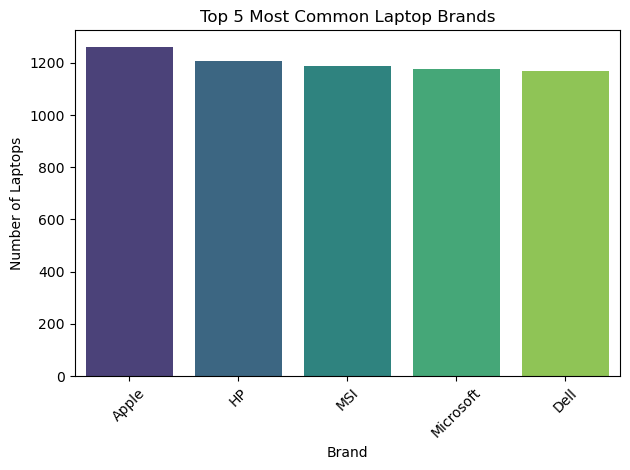

In [25]:
top_5_brands = df['Brand'].value_counts().head(5)
sns.barplot(x=top_5_brands.index, y=top_5_brands.values, palette='viridis')
plt.title('Top 5 Most Common Laptop Brands')
plt.ylabel('Number of Laptops')
plt.xlabel('Brand')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


### Average Price by Brand 

C:\Users\pc\AppData\Local\Temp\ipykernel_1220\4181405835.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=avg_price_by_brand.index, y=avg_price_by_brand.values, palette='coolwarm')


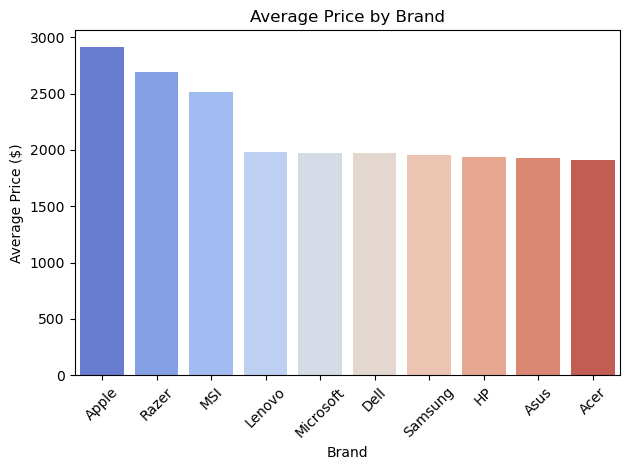

In [26]:
avg_price_by_brand = df.groupby('Brand')['Price ($)'].mean().sort_values(ascending=False)
sns.barplot(x=avg_price_by_brand.index, y=avg_price_by_brand.values, palette='coolwarm')
plt.title('Average Price by Brand')
plt.ylabel('Average Price ($)')
plt.xlabel('Brand')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


### Average Price by Processor Type

In [ ]:
avg_price_by_processor = df.groupby('Processor')['Price ($)'].mean().sort_values(ascending=False)
sns.barplot(x=avg_price_by_processor.index, y=avg_price_by_processor.values, palette='magma')
plt.title('Average Price by Processor')
plt.ylabel('Average Price ($)')
plt.xlabel('Processor')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


### Distribution of Laptops by Operating System

C:\Users\pc\AppData\Local\Temp\ipykernel_1220\1680263618.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=os_distribution.index, y=os_distribution.values, palette='pastel')


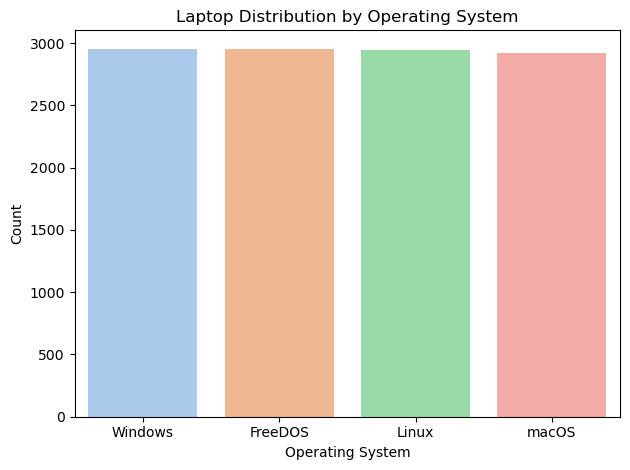

In [27]:
os_distribution = df['Operating System'].value_counts()
sns.barplot(x=os_distribution.index, y=os_distribution.values, palette='pastel')
plt.title('Laptop Distribution by Operating System')
plt.ylabel('Count')
plt.xlabel('Operating System')
plt.tight_layout()
plt.show()


### RAM vs Average Price


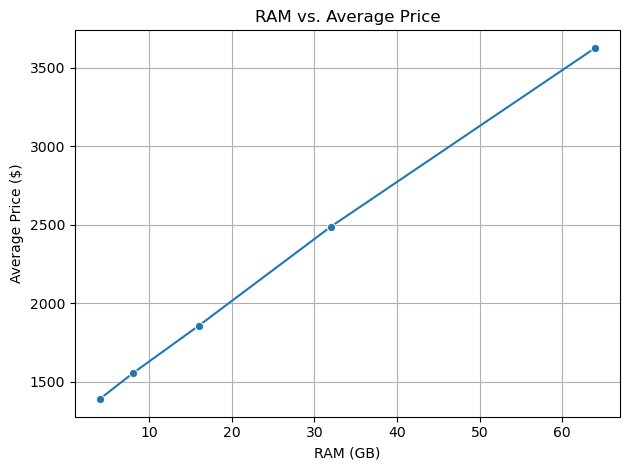

In [28]:
ram_price_relationship = df.groupby('RAM (GB)')['Price ($)'].mean().sort_index()
sns.lineplot(x=ram_price_relationship.index, y=ram_price_relationship.values, marker='o')
plt.title('RAM vs. Average Price')
plt.xlabel('RAM (GB)')
plt.ylabel('Average Price ($)')
plt.grid(True)
plt.tight_layout()
plt.show()


### Average Price by GPU (Top 7)

C:\Users\pc\AppData\Local\Temp\ipykernel_1220\3433328214.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=avg_price_by_gpu.index, y=avg_price_by_gpu.values, palette='cubehelix')


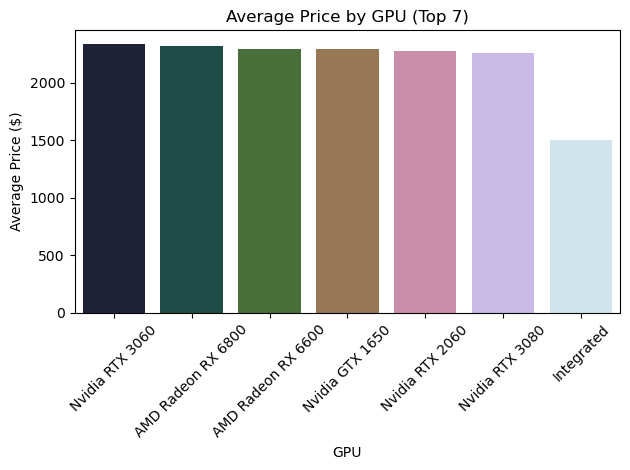

In [29]:
avg_price_by_gpu = df.groupby('GPU')['Price ($)'].mean().sort_values(ascending=False).head(7)
sns.barplot(x=avg_price_by_gpu.index, y=avg_price_by_gpu.values, palette='cubehelix')
plt.title('Average Price by GPU (Top 7)')
plt.ylabel('Average Price ($)')
plt.xlabel('GPU')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


### Correlation – Screen Size vs Weight (Scatter Plot)

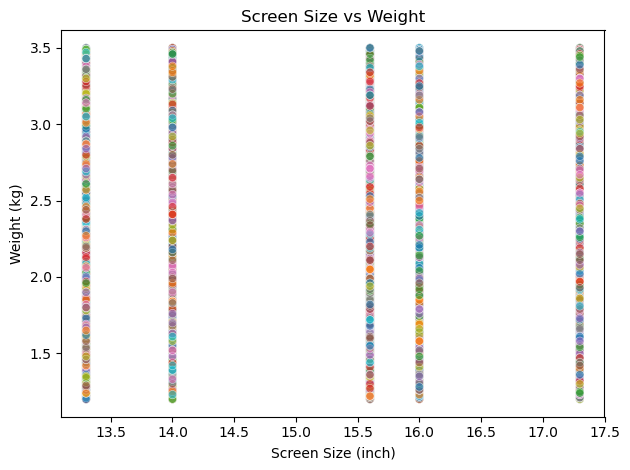

In [30]:
sns.scatterplot(data=df, x='Screen Size (inch)', y='Weight (kg)', hue='Brand', alpha=0.6, legend=False)
plt.title("Screen Size vs Weight")
plt.xlabel("Screen Size (inch)")
plt.ylabel("Weight (kg)")
plt.tight_layout()
plt.show()
